In [1]:
# !pip install tensorflow
# !pip install opencv-python
# !pip install matplotlib

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

# Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

# para cargar imagenes desde internet usaremos estas librerias
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

# nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.1.0


## Importamos el dataset  
Usaremos 60,000 imagenes para entrenar la red y 10,000 imagenes para evaluar con que precision aprendio la red para clasificar las imagenes. Podemos acceder al Fashion MNIST directamente desde TensorFlow.  

Importamos y cargamos los datos de Fashion MNIST directamente desde TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

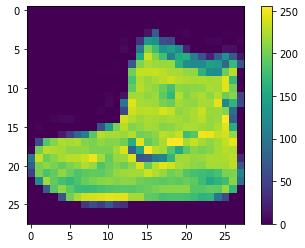

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen:

In [5]:
class_names = ['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa',
               'Zapatilla deportiva', 'Bolso', 'Botines']

<br><br>
## Exploramos datos

In [6]:
train_images[0].shape

(28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Pre - Procesamiento de datos

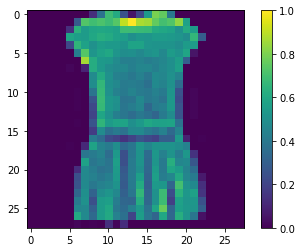

In [12]:
# para que el rango vaya de 0 a 1
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

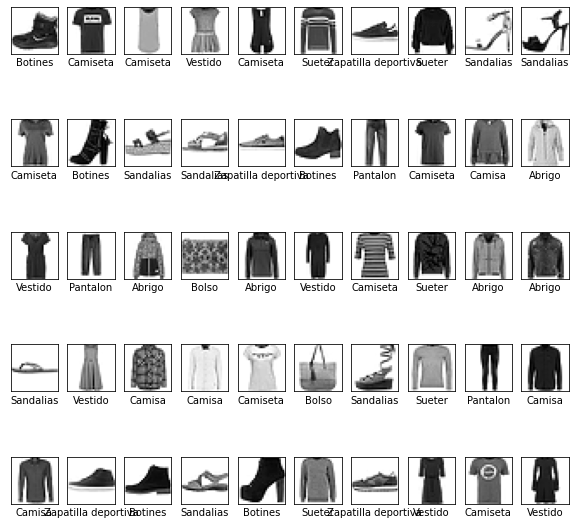

In [13]:
# imprimir varias imagenes
plt.figure(figsize=(10,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
                    
plt.show()

<br><br>
## Configuramos la red neuronal
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compilar el modelo
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<br><br>
## En clasificación
### Target con codificación one hot tensorflow -> categorical_crossentropy
<br><br>
img1->    0   |  0   |   0   |   0   |   0   |   0   |  1   |   0   |  0   |   0 <br>
img2->    0   |  0   |   1   |   0   |   0   |   0   |  0   |   0   |  0   |   0 <br>

<img src="https://i.imgur.com/mtimFxh.png">
<br><br><br><br>

#### Target con enteros para representar categoría -> sparse_categorical_crossentropy
<br><br>
img1-> 2<br>
img2-> 6<br>
<br><br><br>
## En regresiónes 
### loss='mse'
<br><br><br>
## Optimizadores
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Comparación de Adam con otros algoritmos de optimización que entrenan a un perceptrón multicapa" >

In [18]:
# entrenar modelo
# guardar los pesos (callbacks)
checkpoint_path = "checkpoints/check";
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

model.fit(train_images,
          train_labels,
          epochs=10,
          callbacks=[cp_callbacks])

Train on 60000 samples
Epoch 1/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.6124 - accuracy: 0.7927
Epoch 00001: saving model to checkpoints/check
60000/60000 [==============================] - 22s 367us/sample - loss: 0.6122 - accuracy: 0.7928
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.4470 - accuracy: 0.8435
Epoch 00002: saving model to checkpoints/check
60000/60000 [==============================] - 22s 366us/sample - loss: 0.4470 - accuracy: 0.8435
Epoch 3/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.4161 - accuracy: 0.8548 ETA: 1s - loss: 0.4170 - accuracy - ETA: 0s - l
Epoch 00003: saving model to checkpoints/check
60000/60000 [==============================] - 22s 368us/sample - loss: 0.4161 - accuracy: 0.8548
Epoch 4/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.3968 - accuracy: 0.8607
Epoch 00004: saving model to checkpoints/check
60000/60000 [==============================] - 

In [19]:
# # entrenar modelo
# # guardar los pesos (callbacks)
# # aumentamos la epocas
# # implementamos tensorboard

# checkpoint_path = "checkpoints/check";
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

# model.fit(train_images,
#           train_labels, 
#           epochs=50,
#           validation_data = (test_images,test_labels),
#           callbacks = [cp_callbacks, tensorboard_callback])

# # luego ejecutamos en terminal
# # tensorboard --logdir logs/fit

In [20]:
# probar presicion con los datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Presicion -> ', test_acc)

10000/10000 [==============================] - 3s 282us/sample - loss: 0.4162 - accuracy: 0.8519
Presicion ->  0.8519


<br><br>
## Hagamos predicciones

In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([8.2690913e-06, 1.1677958e-07, 2.6999976e-07, 3.4149550e-06,
       3.2635566e-07, 5.1079974e-02, 3.1746677e-07, 2.1683944e-02,
       4.8498153e-03, 9.2237353e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

<br><br>
## Probemos el modelo con una imagen externa y ajena al dataset  

### Muy importante:  

La imagen a comprobar debe ser ingresada luego de recibir el mismo procesamiento que recibieron las magenes de entrenamiento

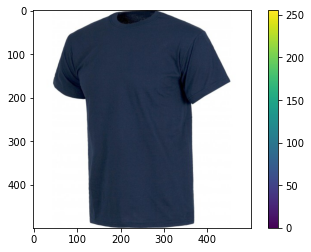

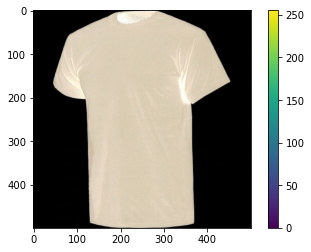

In [24]:
# cargamos una imagen a partir de una url

response = requests.get('https://www.turopalaboral.com/2893-home_default/camiseta-s6600-manga-corta-pack-3-unidades-workteam.jpg')
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

# invertir la imagen
np_img = 255 - np_img

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
# tamaño de la imagen
# 3 dimensiones
np_img.shape

(500, 500, 3)

In [26]:
# observamos que la imagen importada tiene 3 dimensiones,
# por que es a color
# por eso declaramos esta funcion para convertir la imagen a color a escala de grises

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [27]:
bw_image = rgb2gray(np_img)

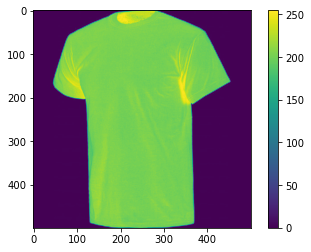

In [28]:
# mostramos la imagen
plt.figure()
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
# tamaño de la imagen
# 2 dimensiones (sin color)
bw_image.shape

(500, 500)

In [30]:
# ahora a la imagen en blanco y negro debemos redimensionarla a 28x28
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

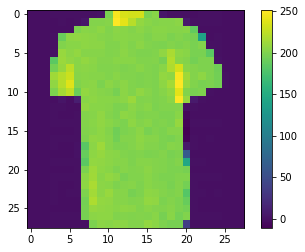

In [31]:
# mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

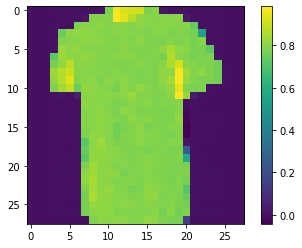

In [32]:
res = res / 255

# mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

## Prediccion con imagen desconocida para el modelo

In [33]:
x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [34]:
x[0] = np.array(res)

In [35]:
predictions = model.predict(x)
predictions

array([[9.9266654e-01, 2.1166250e-05, 1.6350484e-04, 1.7245259e-06,
        2.7632493e-07, 2.2365016e-18, 7.1464591e-03, 3.4275246e-11,
        1.9040516e-07, 5.1021182e-15]], dtype=float32)

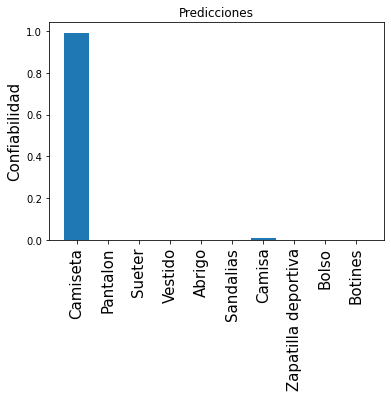

In [36]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

<br><br>
## Creamos un nuevo modelo y lo probamos antes de entrenarlo

In [37]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
loss, acc = model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 351us/sample - loss: 2.4640 - accuracy: 0.1431


In [39]:
acc

0.1431

### Como vemos el rendimiento es pesimo  
### Cargamos los pesos grabados anteriormente y probamos nuevamente

In [40]:
# cargamos los pesos que guardamos y lo volvemos a probar
model2.load_weights(checkpoint_path)

loss, acc = model2.evaluate(test_images, test_labels)
acc

10000/10000 [==============================] - 2s 237us/sample - loss: 0.4162 - accuracy: 0.8519


0.8519